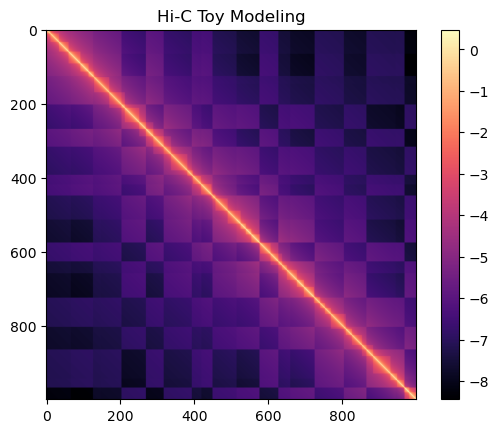

In [157]:
#play with Hi-C, work in progress

import numpy as np
import matplotlib.pyplot as plt

n = 1000
gamma = 1.0

A = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        dist = abs(i-j)
        A[i, j] = 0.5 / (dist+1)**gamma

compartment = np.zeros(n)
pos = 0
while pos < n:
    size = np.random.randint(20,80)
    end = min(pos + size, n)
    value = np.random.choice([-1,1]) * np.random.uniform(0.4, 1.0)
    compartment[pos:end] = value
    pos = end

tad_mask = np.zeros((n,n))
min_size = 10
max_size = 50
poss = 0
while poss < n:
    size = np.random.randint(min_size, max_size+1)
    end = min(poss + size, n)
    tad_mask[poss:end, poss:end] = 1 * np.random.uniform(0.7, 1.0)
    poss = end

A *= (1 + 0.7 * np.outer(compartment, compartment))
A *= (1 + 1.0 * tad_mask)

plt.imshow(np.log(A+1e-6), cmap = 'magma')
plt.colorbar()
plt.title("Hi-C Toy Modeling")
plt.show()

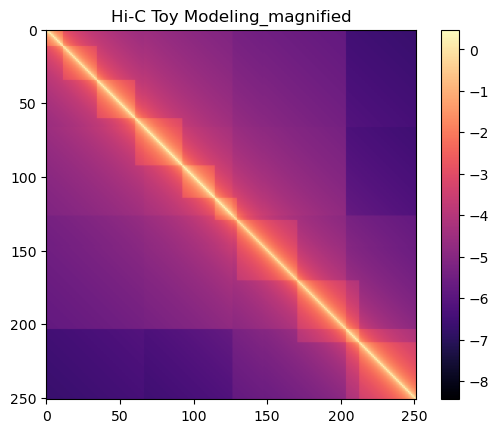

In [164]:
plt.imshow(np.log(A+1e-6), cmap = 'magma')
plt.xlim([0, 251])
plt.ylim([251,0])
plt.colorbar()
plt.title("Hi-C Toy Modeling_magnified")
plt.show()

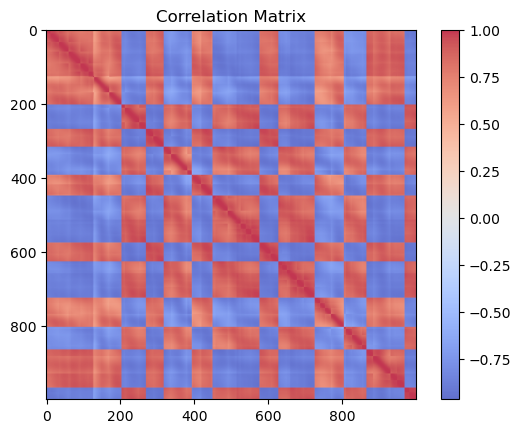

In [159]:
#observed / expected
n = A.shape[0]

y = np.arange(n)
dist_matrix = np.abs(y[:, None] - y[None, :])

max_dist_matrix = np.max(dist_matrix)
mean_dist = np.zeros(max_dist_matrix + 1)

for k in range(max_dist_matrix + 1):
    mean_dist[k] = np.mean(A[dist_matrix == k])

A_OE = A / mean_dist[dist_matrix]
A_OEC = np.corrcoef(A_OE)

plt.imshow(A_OEC, cmap = 'coolwarm', alpha = 0.8)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

In [160]:
#get eigenvectors

eigvals, eigvecs = np.linalg.eigh(A_OEC)

In [161]:
idx = np.argsort(eigvals)[::-1]

eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

#print(eigvals)
#print(eigvecs)

Text(0.5, 1.0, 'eigvec_1')

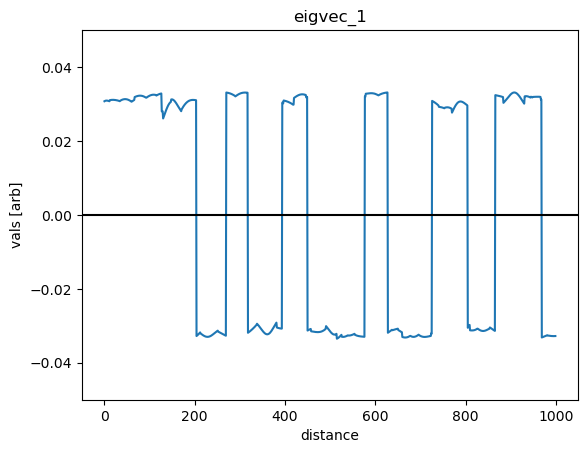

In [165]:
plt.plot(np.arange(0,len(eigvecs[:,0])), eigvecs[:,0])
plt.xlabel("distance")
plt.ylabel("vals [arb]")
plt.ylim([-0.05, 0.05])
plt.axhline(0, color = 'black')
plt.title("eigvec_1")

In [166]:
print(eigvals[0])

851.0829372109397


In [167]:
print(eigvals[-1])

1.5927992512551338e-16


In [168]:
A_re = eigvecs @ np.diag(eigvals) @ eigvecs.T

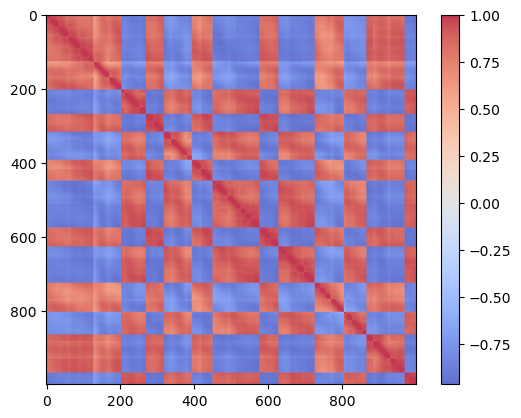

In [176]:
plt.imshow(A_re + 1e-6, cmap = 'coolwarm', alpha = 0.8)
plt.colorbar()
#decomposition 이후에 재구성하기

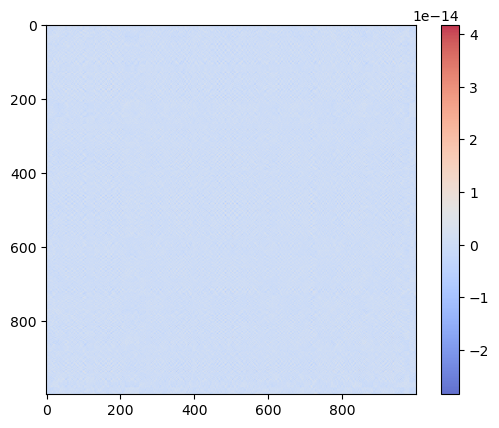

In [180]:
plt.imshow((A_re - A_OEC), cmap = 'coolwarm', alpha = 0.8)
plt.colorbar()

In [181]:
e1 = eigvecs[:,0]
A_1stlead = eigvals[0] * np.outer(e1, e1)

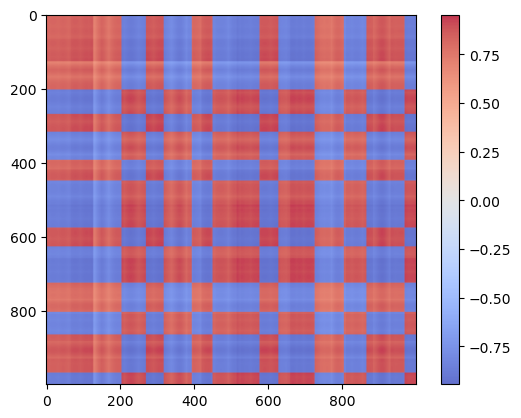

In [184]:
plt.imshow(A_1stlead, cmap = 'coolwarm', alpha = 0.8)
plt.colorbar()

In [103]:
e2 = eigvecs[:,1]
A_2ndlead = eigvals[1] * np.outer(e2, e2)

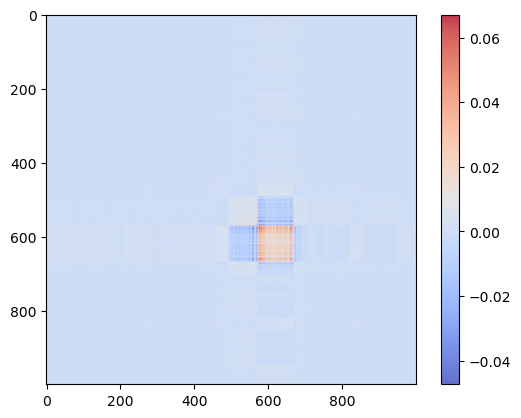

In [185]:
plt.imshow(A_2ndlead, cmap = 'coolwarm', alpha = 0.8)
plt.colorbar()

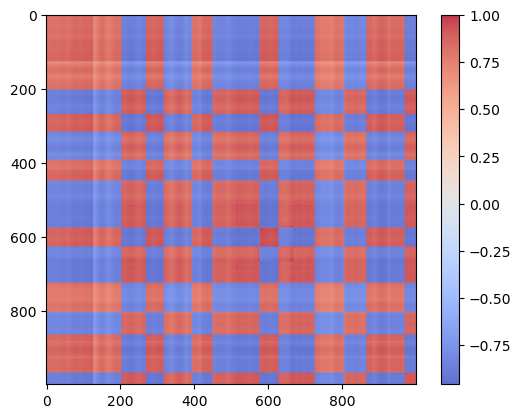

In [186]:
plt.imshow(A_1stlead + A_2ndlead, cmap = 'coolwarm', alpha = 0.8)
plt.colorbar()

Text(0.5, 1.0, 'O/E')

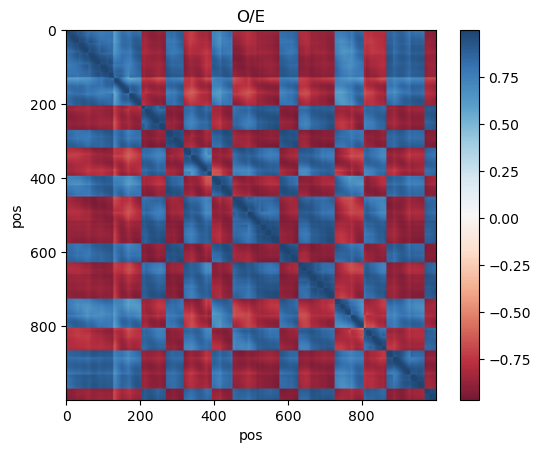

In [208]:
A_topn = np.zeros_like(A)  # A는 원래 행렬
plt.figure()
for i in range(250):
    ei = eigvecs[:, i]
    A_topn += eigvals[i] * np.outer(ei, ei)
plt.imshow(A_topn, cmap = 'RdBu', alpha = 0.9)
plt.colorbar()
plt.ylabel("pos")
plt.xlabel("pos")
plt.title("O/E")
plt.show()

In [107]:
#no normalization